In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, kruskal, sem, f_oneway
from sklearn.utils import resample
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

In [16]:
dataset = 'data_with_prior_accuracy.csv'
filtered_data = pd.read_csv(dataset)
data = filtered_data
data

session  trialno difficulty  accuracy sideChosen  durExplorationPeriod  \
0    curE002a        8       Easy       0.0       left                 11270   
1    curE002a        9       Easy       1.0       left                  2498   
2    curE002a       10       Easy       1.0      right                  9912   
3    curE002a       11     Medium       1.0      right                  2328   
4    curE002a       12     Medium       0.0       left                 14272   
..        ...      ...        ...       ...        ...                   ...   
850  curE122a       16       Easy       0.0       left                  6080   
851  curE122a       25       Easy       1.0       left                  2714   
852  curE122a       26     Medium       0.0       left                  2378   
853  curE122a       27     Medium       1.0       left                 13092   
854  curE122a       28     Medium       1.0      right                 13796   

     durDecisionPeriod  durPeriodTotal  SwitchesExplorationPeriod  \
0                  924           12194                          6   
1                 2182            4680                          2   
2                 2914           12826                          3   
3                 1582            3910                          2   
4                  984           15256                          5   
..                 ...             ...                        ...   
850               1298            7378                          1   
851               8398           11112                          1   
852                566            2944                          1   
853               1598           14690                          2   
854                566           14362                          3   

     SwitchesDecisionPeriod  ...  FixNb  FixNbInTDecision  \
0                         0  ...     22                 1   
1                         0  ...     10                 3   
2                         1  ...     17                 3   
3                         1  ...     10                 3   
4                         1  ...     26                 1   
..                      ...  ...    ...               ...   
850                       0  ...     17                 2   
851                       0  ...     16                 8   
852                       1  ...      6                 0   
853                       0  ...     25                 4   
854                       1  ...     24                 0   

     FixNbInLExploration  FixNbInRExploration  FixNbBottomExploration  \
0                     13                    5                      18   
1                      3                    2                       5   
2                      3                    5                       8   
3                      2                    1                       3   
4                     14                    7                      21   
..                   ...                  ...                     ...   
850                    7                    3                      10   
851                    3                    0                       3   
852                    3                    0                       3   
853                   15                    3                      18   
854                    5                   16                      21   

     LookDurInTDecision  LookDurInLExploration  LookDurInRExploration  \
0                  1208                   4404                   1076   
1                  2176                   1036                    634   
2                  2020                    754                   1904   
3                  1780                    584                    410   
4                  1296                   4854                   2700   
..                  ...                    ...                    ...   
850                1974                   3370                    790   
851                445

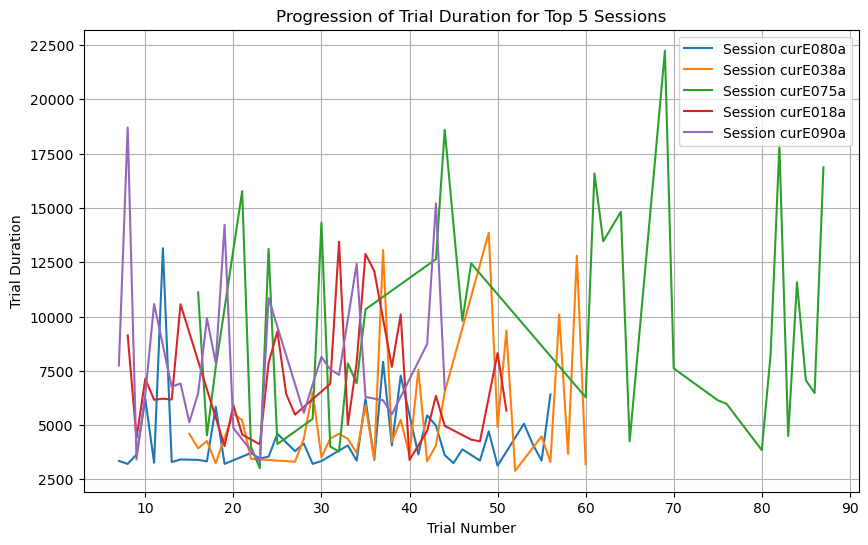

In [3]:
# Progression of durPeriodTotal throughout the trials (top sessions)
#Not important
session_trial_dur = data.groupby(['session', 'trialno'])['durPeriodTotal'].mean().reset_index()

# Find top 10 sessions with the largest number of trials
top_sessions = session_trial_dur.groupby('session')['trialno'].count().nlargest(5).index

# Plot
plt.figure(figsize=(10, 6))

for session in top_sessions:
    session_data = session_trial_dur[session_trial_dur['session'] == session]
    plt.plot(session_data['trialno'], session_data['durPeriodTotal'], label=f'Session {session}')

plt.xlabel('Trial Number')
plt.ylabel('Trial Duration')
plt.title('Progression of Trial Duration for Top 5 Sessions')
plt.legend()
plt.grid(True)
plt.show()

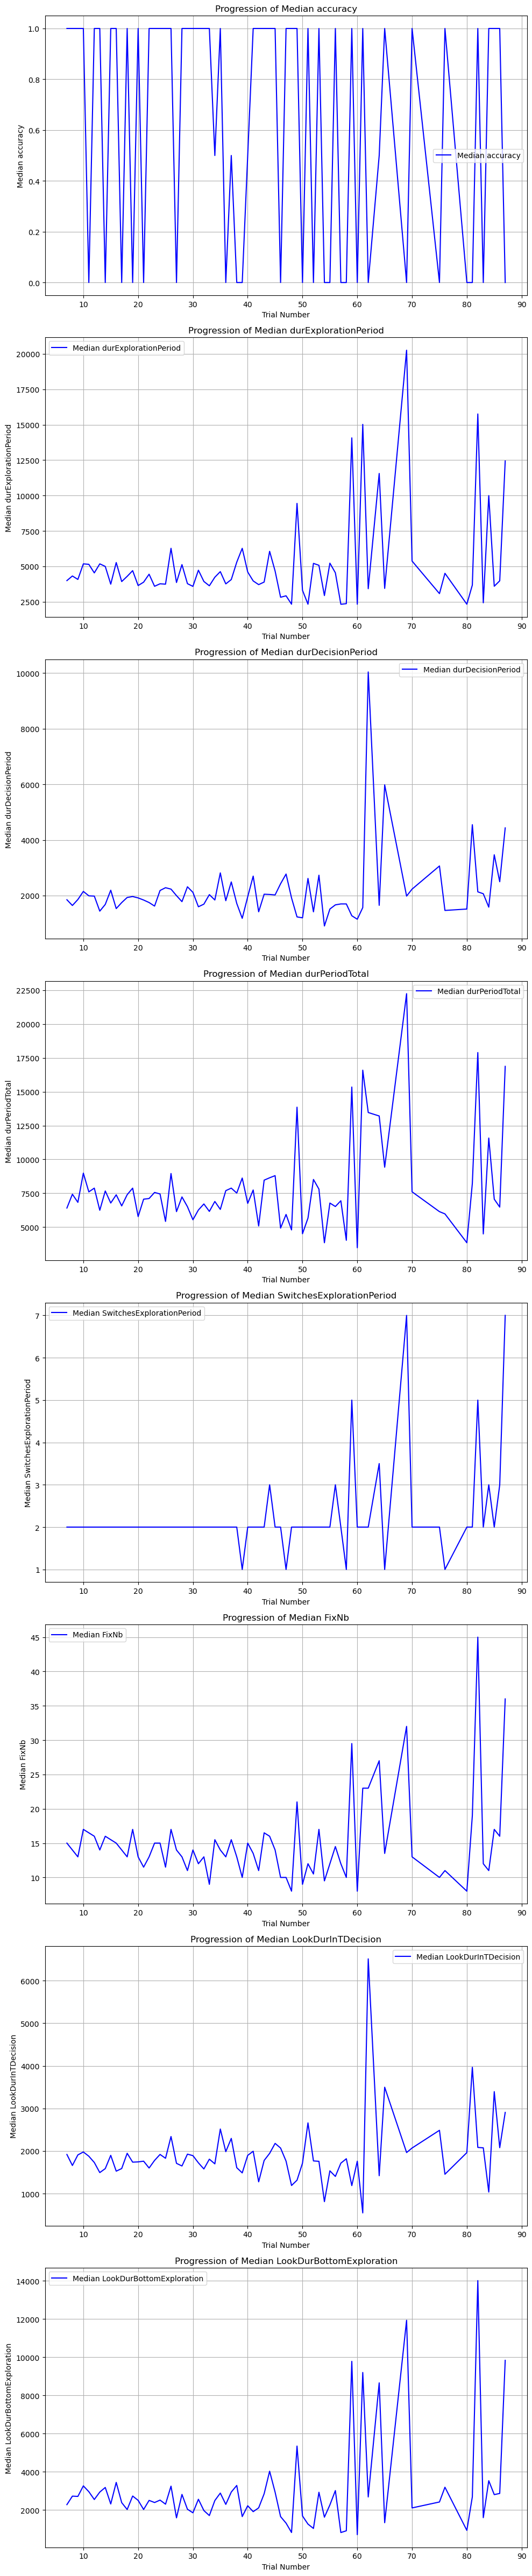

In [4]:
#Progression per variable (median for all sessions)
#Not important 

variables_to_plot = [
    'accuracy',
    'durExplorationPeriod',
    'durDecisionPeriod',
    'durPeriodTotal',
    'SwitchesExplorationPeriod',
    'FixNb',
    'LookDurInTDecision',
    'LookDurBottomExploration'
]

fig, axs = plt.subplots(len(variables_to_plot), 1, figsize=(10, 6 * len(variables_to_plot)))

for i, var in enumerate(variables_to_plot):
    
    median_var_per_trial = data.groupby('trialno')[var].median().reset_index()
    
    # Plotting
    axs[i].plot(median_var_per_trial['trialno'], median_var_per_trial[var], label=f'Median {var}', color='blue')
    axs[i].set_xlabel('Trial Number')
    axs[i].set_ylabel(f'Median {var}')
    axs[i].set_title(f'Progression of Median {var}')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

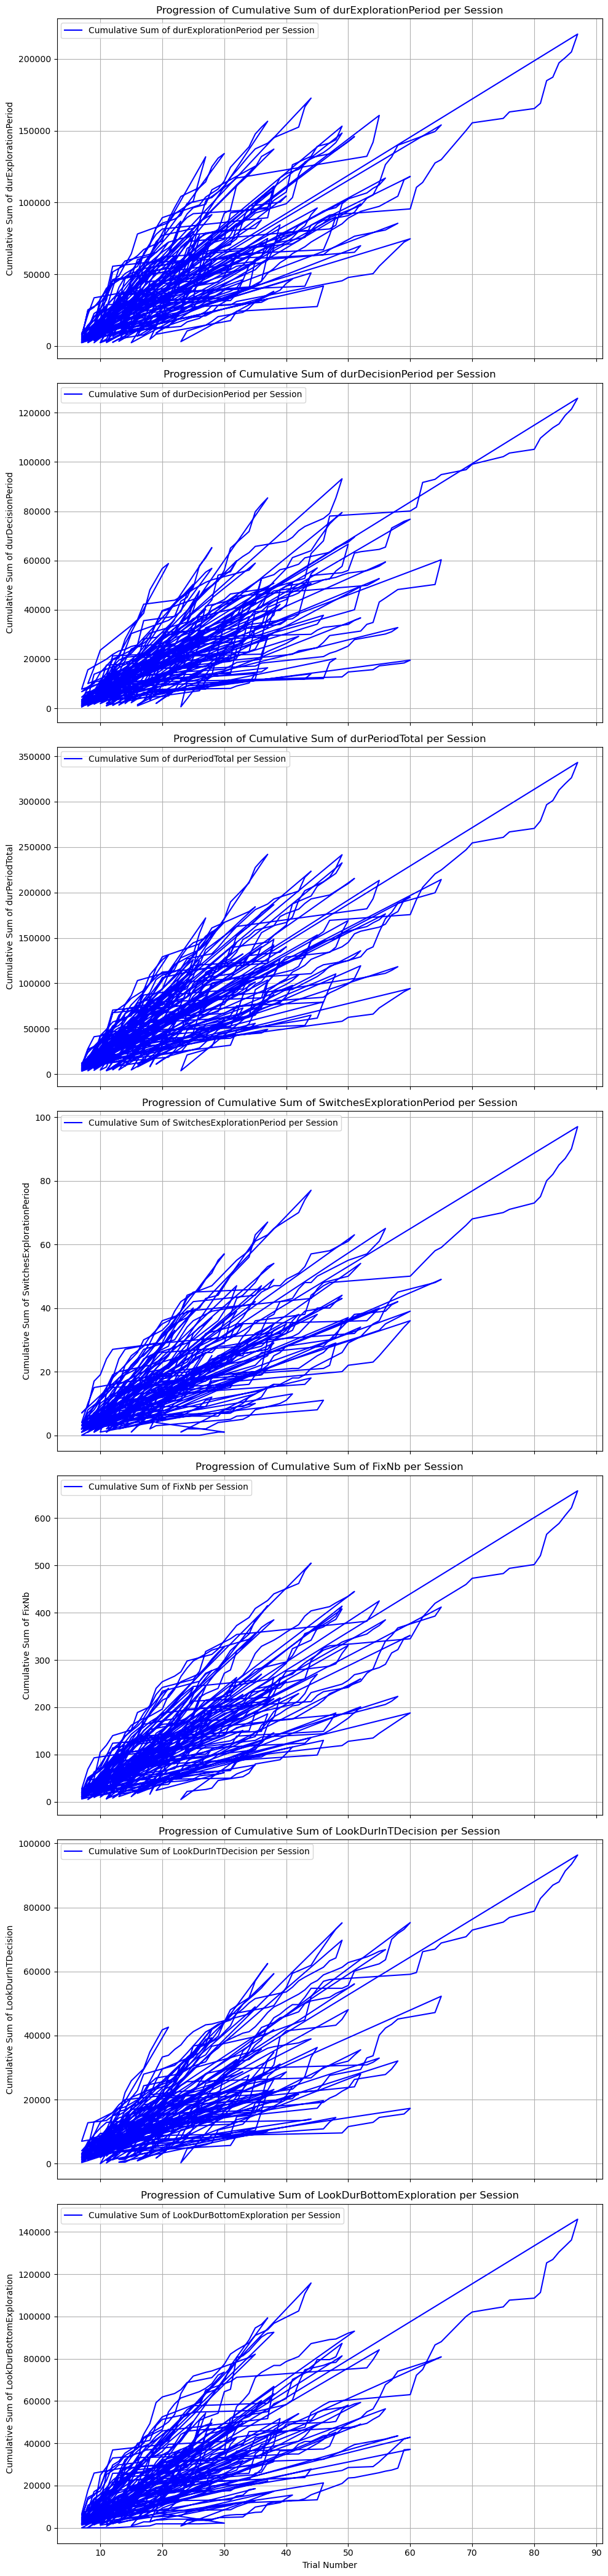

In [31]:
#Cumulative sum of different features per session

variables_to_plot = [
    'durExplorationPeriod',
    'durDecisionPeriod',
    'durPeriodTotal',
    'SwitchesExplorationPeriod',
    'FixNb',
    'LookDurInTDecision',
    'LookDurBottomExploration'
]

fig, axs = plt.subplots(len(variables_to_plot), 1, figsize=(10, 6 * len(variables_to_plot)), sharex=True)

for i, var in enumerate(variables_to_plot):
    cumulative_sum_per_session = data.groupby('session')[var].cumsum()

    axs[i].plot(data['trialno'], cumulative_sum_per_session, label=f'Cumulative Sum of {var} per Session', color='blue')
    axs[i].set_ylabel(f'Cumulative Sum of {var}')
    axs[i].set_title(f'Progression of Cumulative Sum of {var} per Session')
    axs[i].grid(True)
    axs[i].legend()

axs[-1].set_xlabel('Trial Number')

plt.tight_layout()
plt.show()

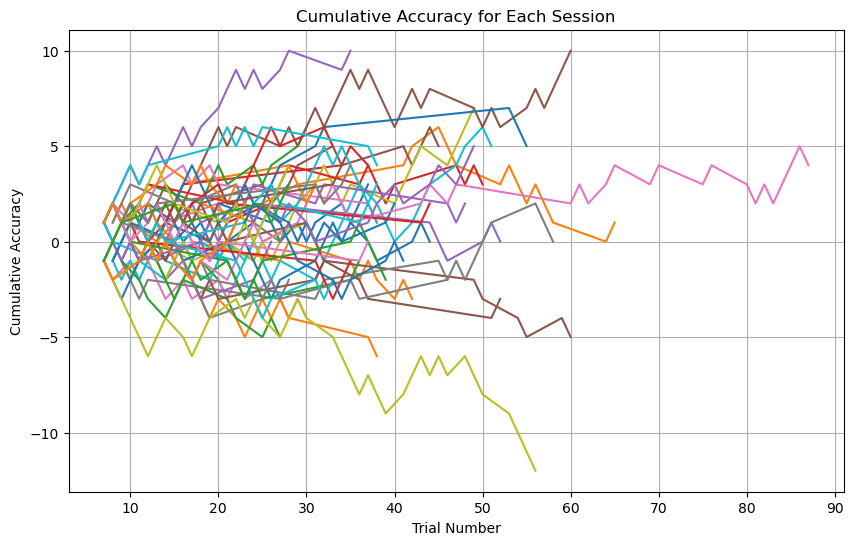

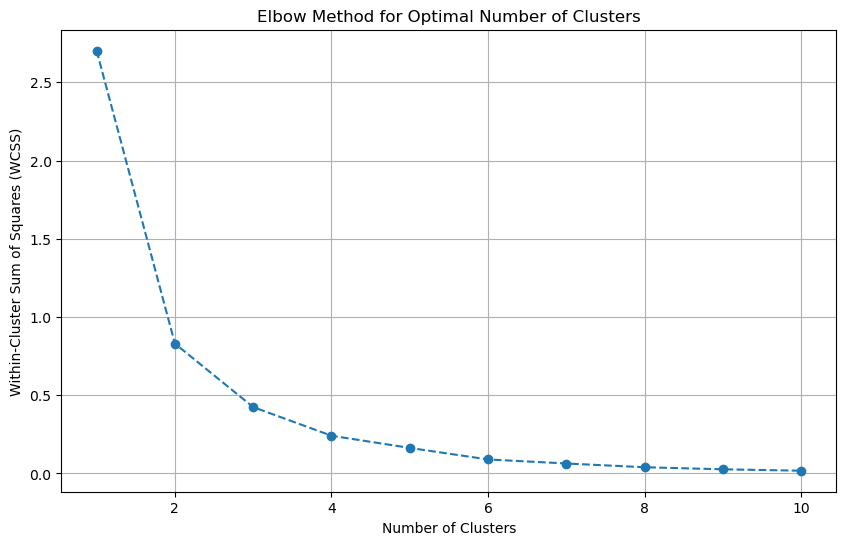

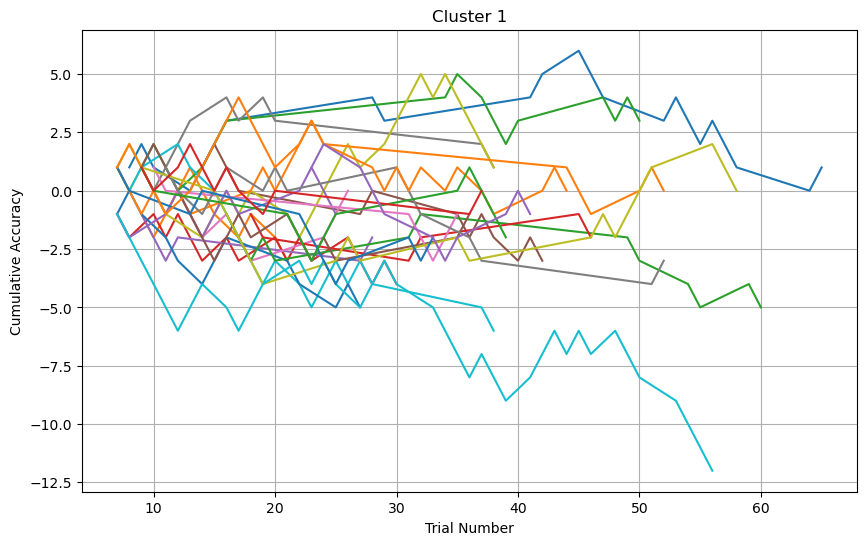

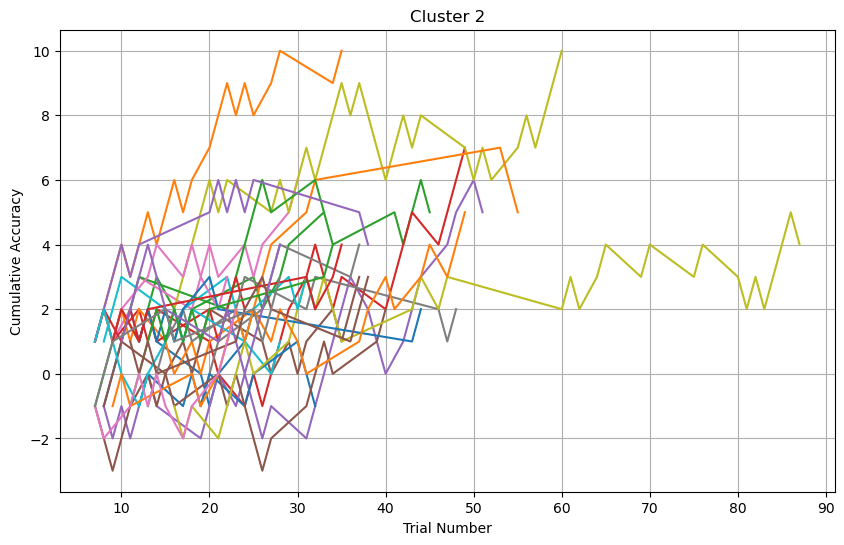

Cluster 1: curE004a, curE008a, curE009a, curE013a, curE014a, curE024a, curE034a, curE039a, curE046a, curE050a, curE051a, curE054a, curE055a, curE058a, curE062a, curE070a, curE071a, curE074a, curE078a, curE080a, curE082a, curE090a, curE098a, curE112a, curE120a
Cluster 2: curE002a, curE011a, curE012a, curE017a, curE018a, curE019a, curE027a, curE030a, curE038a, curE041a, curE045a, curE049a, curE052a, curE056a, curE063a, curE066a, curE067a, curE072a, curE075a, curE092a, curE104a, curE106a, curE109a, curE113a, curE115a, curE119a, curE121a, curE122a


In [52]:
# Cumulative accuracy over trials for each session
# For each correct trial, it adds 1, and for each incorrect trial, it subtracts 1

warnings.filterwarnings("ignore")
cumulative_accuracy_data = []

for session, session_data in data.groupby('session'):
    cumulative_accuracy = 0
    for index, trial in session_data.iterrows():
        if trial['accuracy'] == 1:
            cumulative_accuracy += 1
        else:
            cumulative_accuracy -= 1
        cumulative_accuracy_data.append({'session': session, 'trialno': trial['trialno'], 'cumulative_accuracy': cumulative_accuracy})

cumulative_accuracy_df = pd.DataFrame(cumulative_accuracy_data)

plt.figure(figsize=(10, 6))
for session, session_data in cumulative_accuracy_df.groupby('session'):
    plt.plot(session_data['trialno'], session_data['cumulative_accuracy'], label=f'Session {session}')

plt.xlabel('Trial Number')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy for Each Session')
#plt.legend()
plt.grid(True)
plt.show()

# Calculating slope for each session
slope_data = []

for session, session_data in cumulative_accuracy_df.groupby('session'):
    trial_numbers = session_data['trialno']
    cumulative_accuracies = session_data['cumulative_accuracy']
    slopes = np.diff(cumulative_accuracies) / np.diff(trial_numbers)
    avg_slope = np.mean(slopes)
    slope_data.append({'session': session, 'average_slope': avg_slope})

slope_df = pd.DataFrame(slope_data)

# Clustering babies according to their tendency

wcss = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(slope_df[['average_slope']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

optimal_num_clusters = 2
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(slope_df[['average_slope']])

for i in range(optimal_num_clusters):
    plt.figure(figsize=(10, 6))
    cluster_sessions = slope_df[clusters == i]['session']
    for session in cluster_sessions:
        session_data = cumulative_accuracy_df[cumulative_accuracy_df['session'] == session]
        plt.plot(session_data['trialno'], session_data['cumulative_accuracy'], label=f'Session {session}')
    plt.xlabel('Trial Number')
    plt.ylabel('Cumulative Accuracy')
    plt.title(f'Cluster {i+1}')
    #plt.legend()
    plt.grid(True)
    plt.show()

for i in range(optimal_num_clusters):
    sessions_in_cluster = slope_df.loc[clusters == i, 'session']
    print(f"Cluster {i+1}: {', '.join(map(str, sessions_in_cluster))}")

In [55]:
# Dataset with difference among variables trial by trial

variables = ['accuracy', 'durExplorationPeriod', 'durDecisionPeriod', 'durPeriodTotal',
             'SwitchesExplorationPeriod',   'SwitchesDecisionPeriod', 'NbSwitches', 'FixNb', 
             'FixNbInTDecision', 'FixNbInLExploration', 'FixNbInRExploration', 'FixNbBottomExploration',
             'LookDurInTDecision', 'LookDurInLExploration', 'LookDurInRExploration', 'LookDurBottomExploration']

for variable in variables:
    data[f'{variable}_improvement'] = (data.groupby('session')[variable]
                                      .diff()
                                      .where((data['trialno'].shift(1) == data['trialno'] - 1) |
                                             (data['trialno'].shift(-1) == data['trialno'] + 1) |
                                             (data['trialno'].shift(1).isna()) |
                                             (data['trialno'].shift(-1).isna()))
                                    )
    
for variable in variables:
    data.loc[data['trialno'] == 1, f'{variable}_improvement'] = pd.NA

data.head()

session  trialno difficulty  accuracy sideChosen  durExplorationPeriod  \
0  curE002a        8       Easy       0.0       left                 11270   
1  curE002a        9       Easy       1.0       left                  2498   
2  curE002a       10       Easy       1.0      right                  9912   
3  curE002a       11     Medium       1.0      right                  2328   
4  curE002a       12     Medium       0.0       left                 14272   

   durDecisionPeriod  durPeriodTotal  SwitchesExplorationPeriod  \
0                924           12194                          6   
1               2182            4680                          2   
2               2914           12826                          3   
3               1582            3910                          2   
4                984           15256                          5   

   SwitchesDecisionPeriod  ...  NbSwitches_improvement  FixNb_improvement  \
0                       0  ...                     NaN                NaN   
1                       0  ...                    -4.0              -12.0   
2                       1  ...                     2.0                7.0   
3                       1  ...                    -1.0               -7.0   
4                       1  ...                     3.0               16.0   

   FixNbInTDecision_improvement  FixNbInLExploration_improvement  \
0                           NaN                              NaN   
1                           2.0                            -10.0   
2                           0.0                              0.0   
3                           0.0                             -1.0   
4                          -2.0                             12.0   

   FixNbInRExploration_improvement  FixNbBottomExploration_improvement  \
0                              NaN                                 NaN   
1                             -3.0                               -13.0   
2                              3.0                                 3.0   
3                             -4.0                                -5.0   
4                              6.0                                18.0   

   LookDurInTDecision_improvement  LookDurInLExploration_improvement  \
0                             NaN                                NaN   
1                           968.0                            -3368.0   
2                          -156.0                             -282.0   
3                          -240.0                             -170.0   
4                          -484.0                             4270.0   

   LookDurInRExploration_improvement  LookDurBottomExploration_improvement  
0                                NaN                                   NaN  
1                             -442.0                               -3810.0  
2                             1270.0                                 988.0  
3                            -1494.0                               -1664.0  
4                             2290.0                                6560.0  

[5 rows x 39 columns]

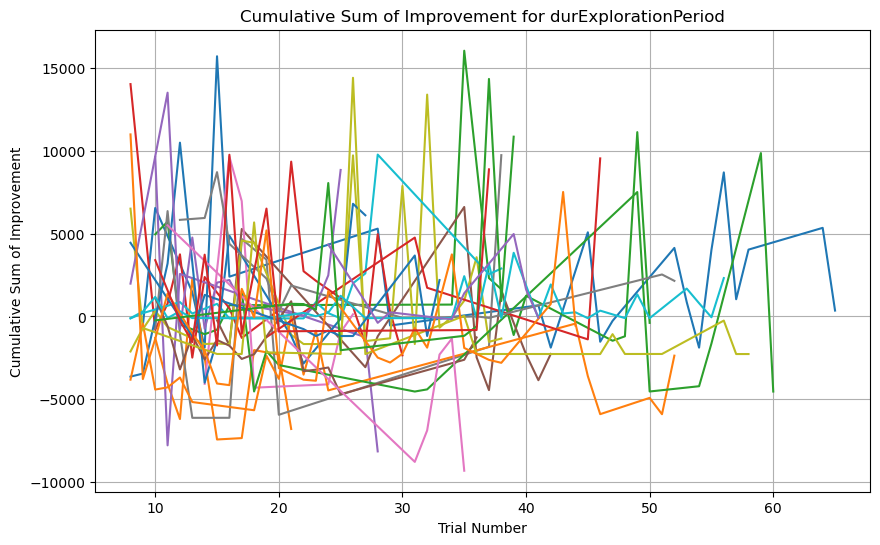

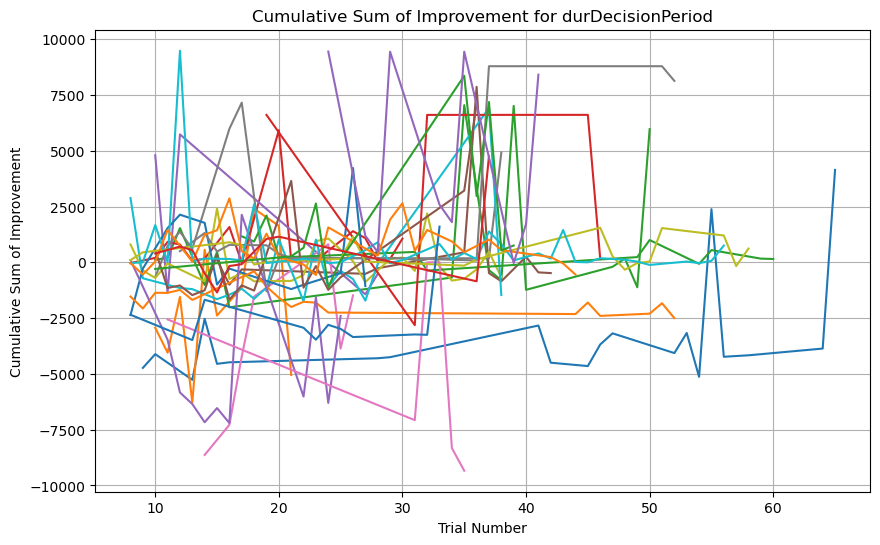

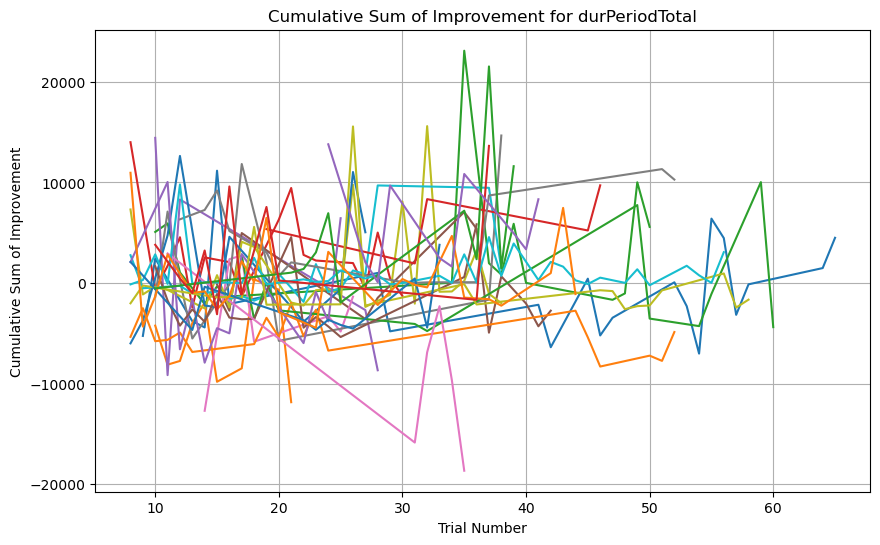

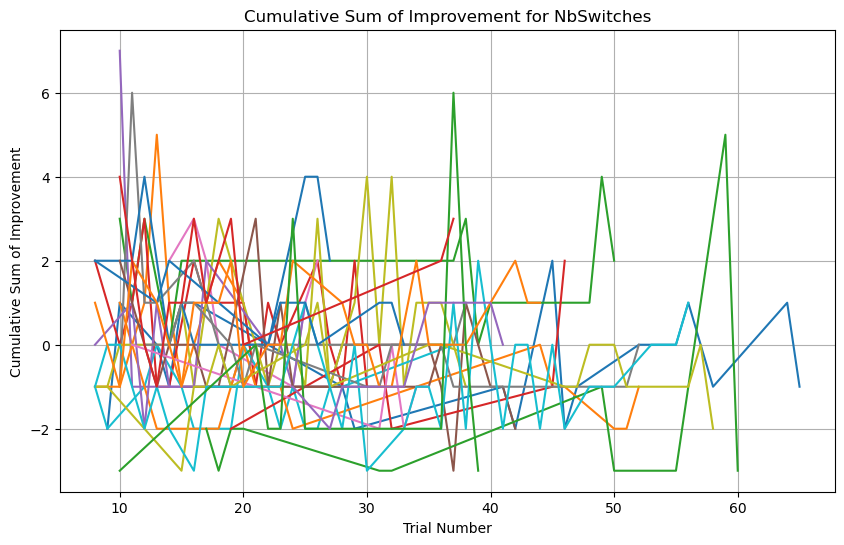

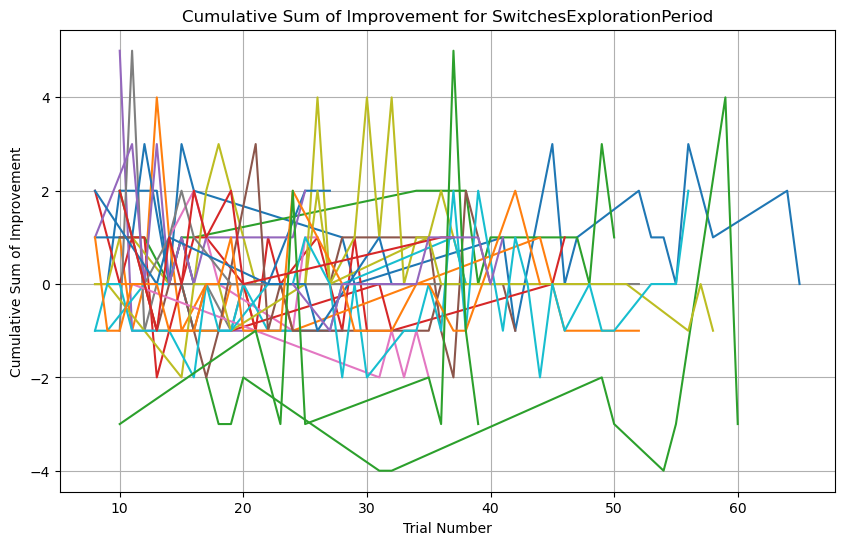

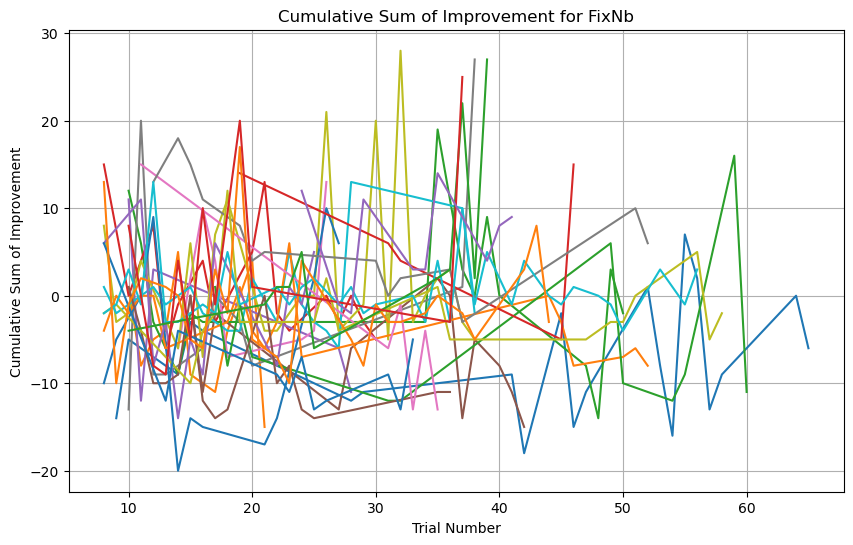

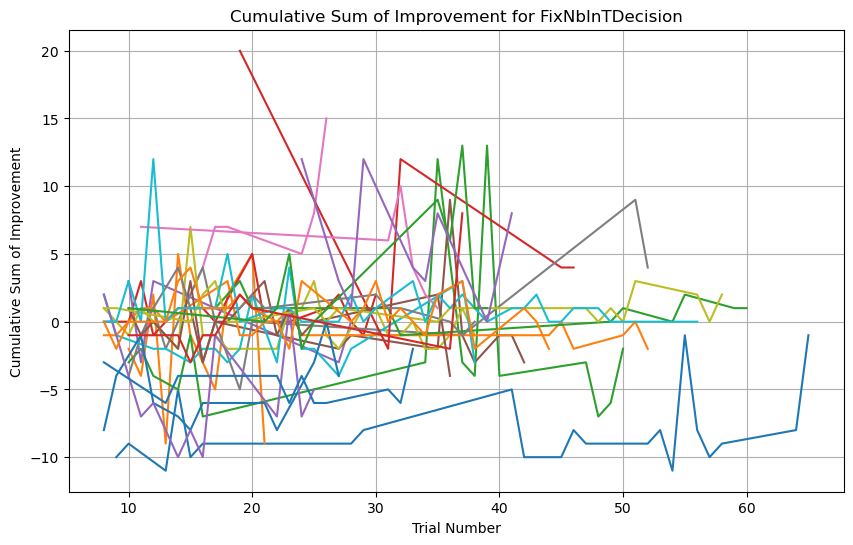

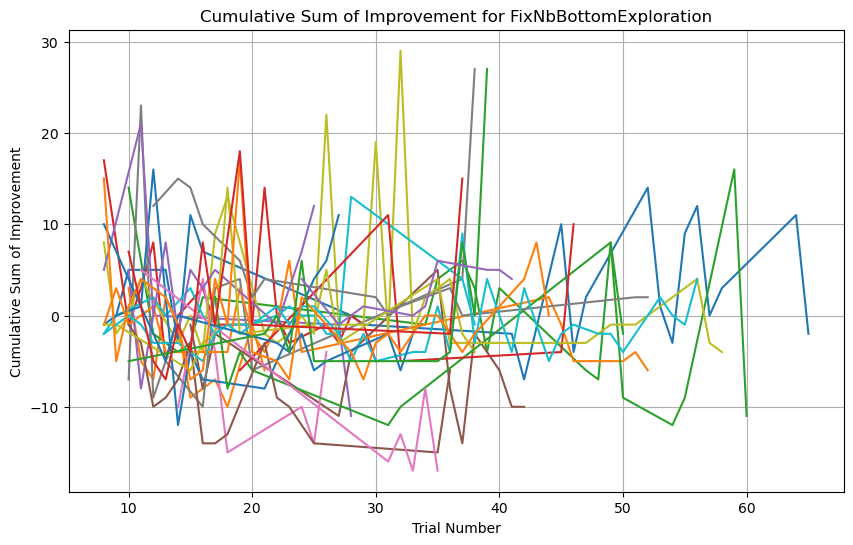

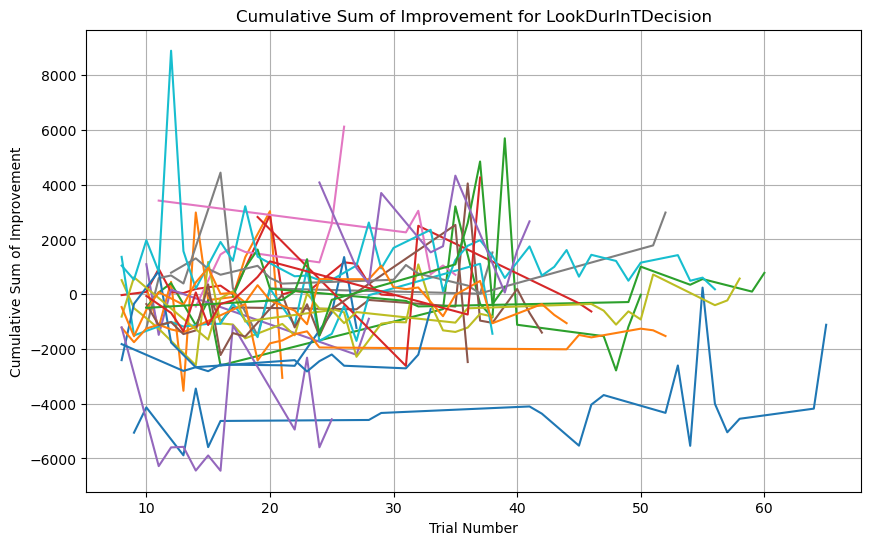

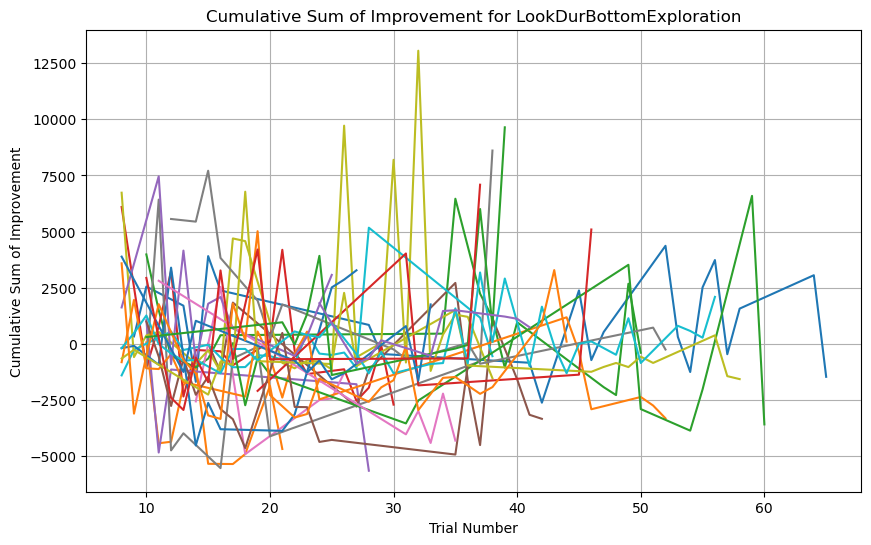

In [57]:
# Check progression (cumulative sum of improvement) of sessions in cluster 1 (tendency to get worse in the memory task) for the following variables: 
# durExplorationPeriod, durDecisionPeriod, durPeriodTotal, NbSwitches, SwitchesExplorationPeriod, FixNb, FixNbInTDecision, FixNbBottomExploration, LookDurInTDecision, LookDurBottomExploration

sessions_cluster1 = [
    'curE004a', 'curE008a', 'curE009a', 'curE013a', 'curE014a', 'curE024a', 'curE034a', 'curE039a', 'curE046a',
    'curE050a', 'curE051a', 'curE054a', 'curE055a', 'curE058a', 'curE062a', 'curE070a', 'curE071a', 'curE074a',
    'curE078a', 'curE080a', 'curE082a', 'curE090a', 'curE098a', 'curE112a', 'curE120a'
]

variables = [
    'durExplorationPeriod', 'durDecisionPeriod', 'durPeriodTotal', 'NbSwitches', 'SwitchesExplorationPeriod', 
    'FixNb', 'FixNbInTDecision', 'FixNbBottomExploration', 'LookDurInTDecision', 'LookDurBottomExploration'
]

cumulative_improvement_data = {variable: [] for variable in variables}

for session in sessions_cluster1:
    session_data = data[data['session'] == session]
    for variable in variables:
        session_variable = f'{variable}_improvement'
        cumulative_improvement = session_data[session_variable].cumsum()
        cumulative_improvement_data[variable].append(cumulative_improvement)

for variable in variables:
    plt.figure(figsize=(10, 6))
    for session, cumulative_improvement in zip(sessions_cluster1, cumulative_improvement_data[variable]):
        plt.plot(data[data['session'] == session]['trialno'], cumulative_improvement, label=f'Session {session}')
    plt.title(f'Cumulative Sum of Improvement for {variable}')
    plt.xlabel('Trial Number')
    plt.ylabel('Cumulative Sum of Improvement')
    #plt.legend()
    plt.grid(True)
    plt.show()

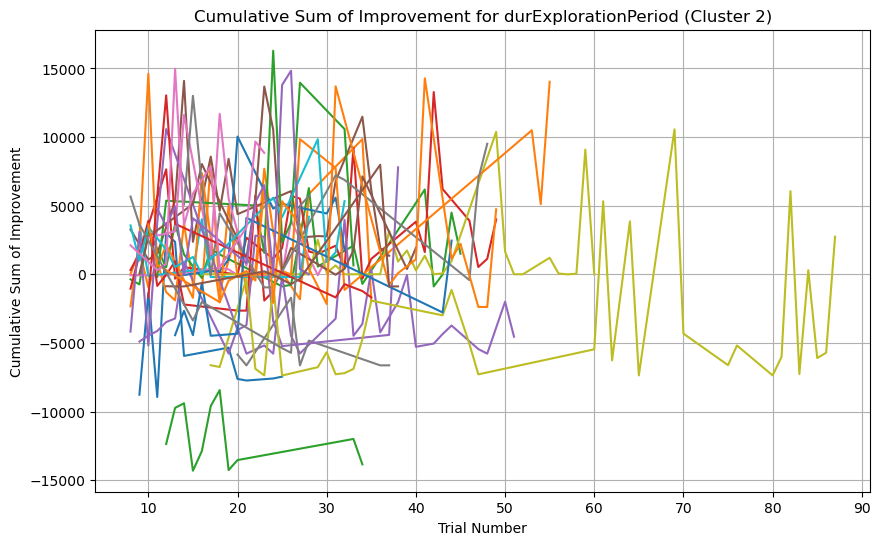

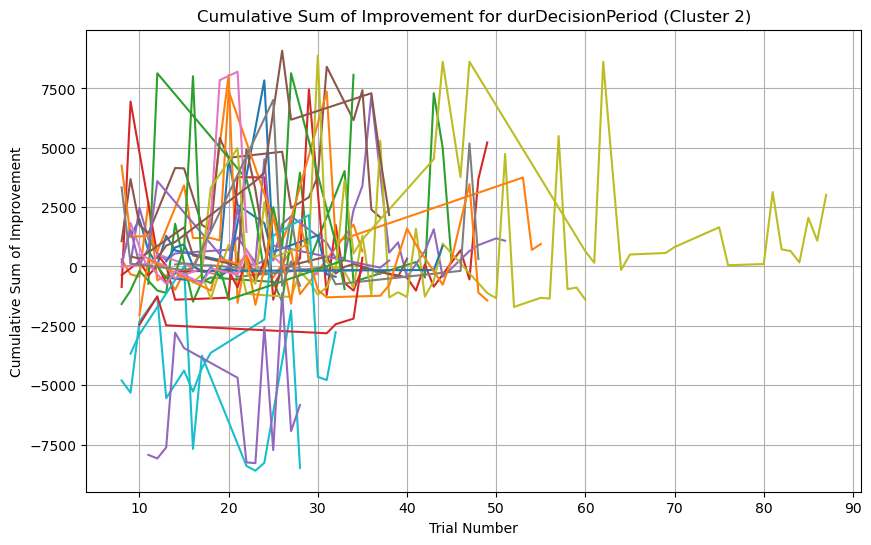

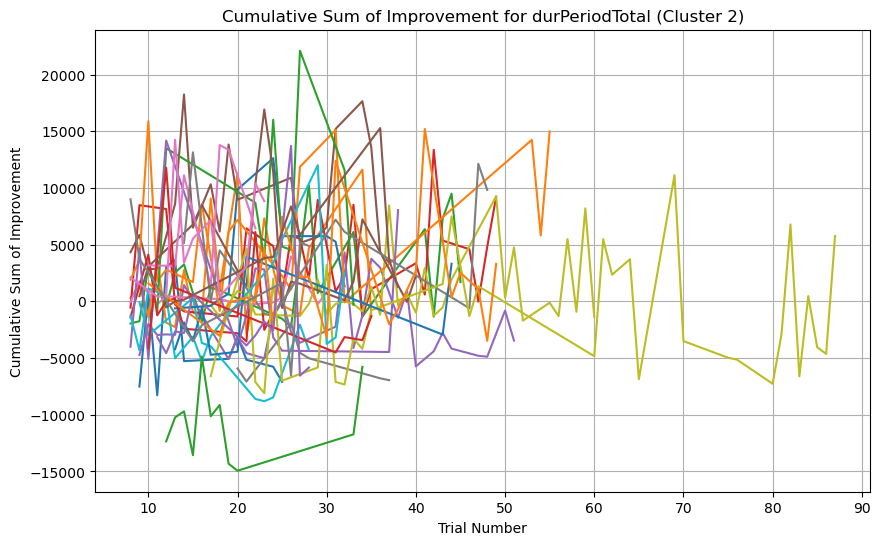

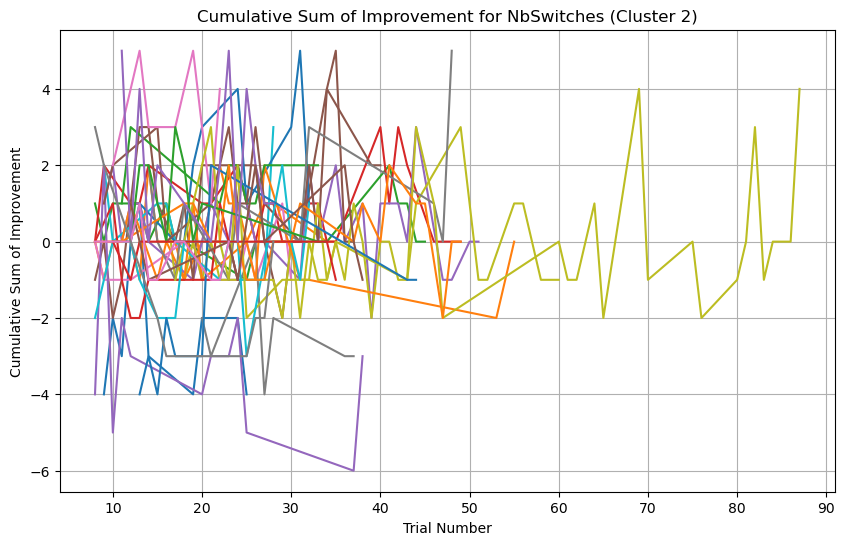

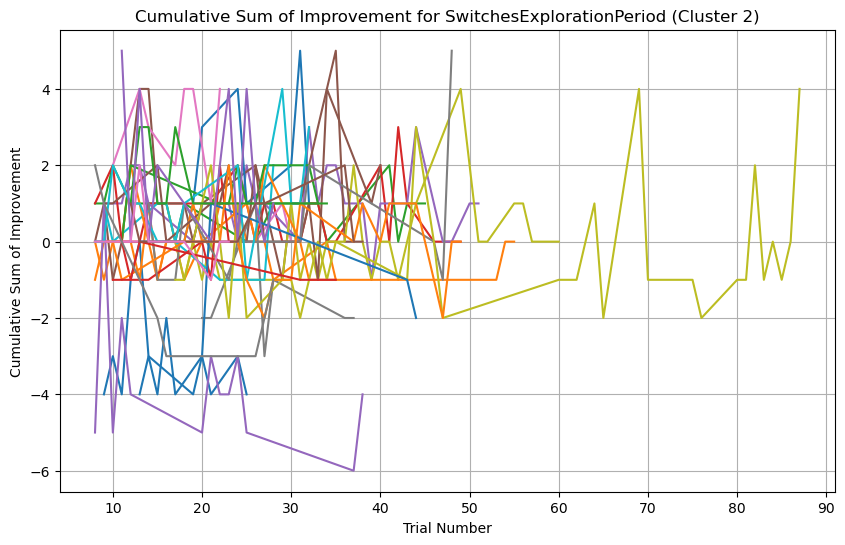

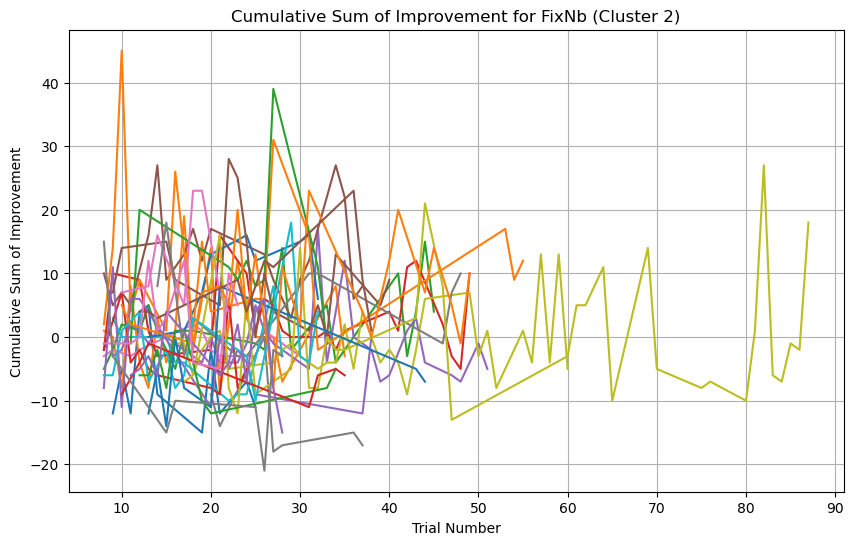

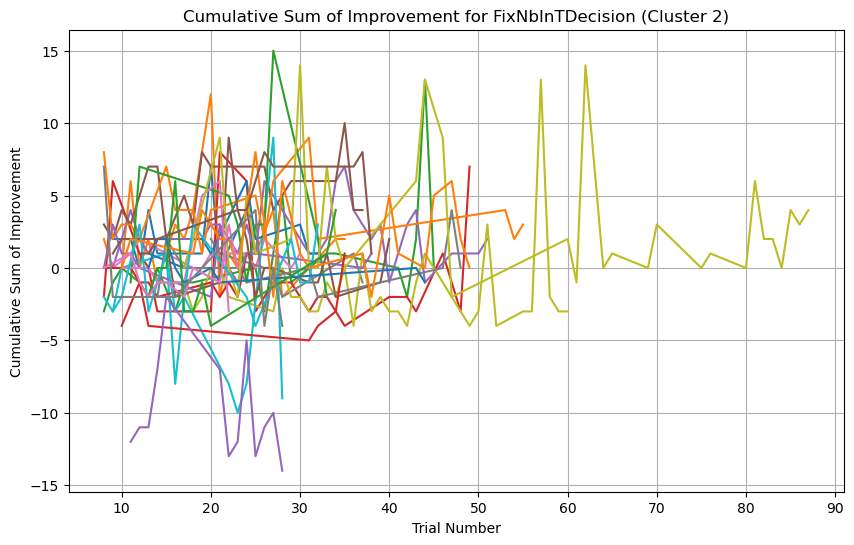

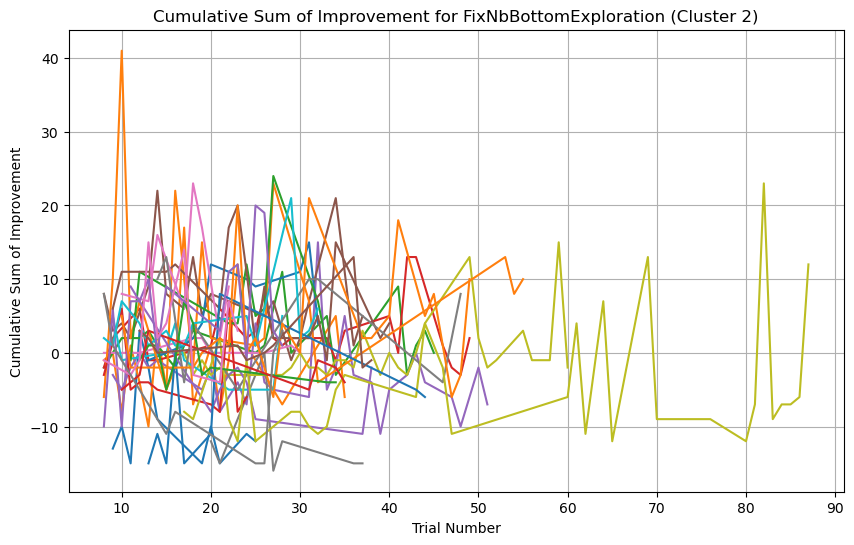

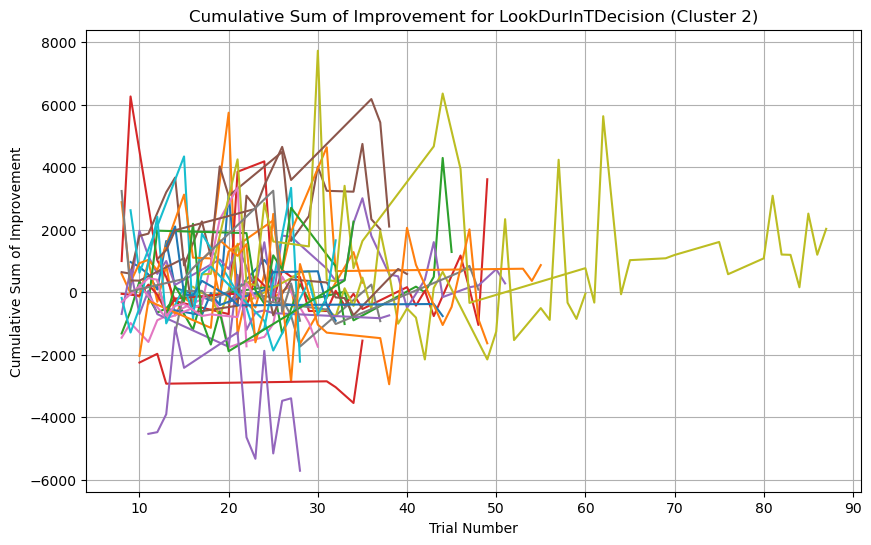

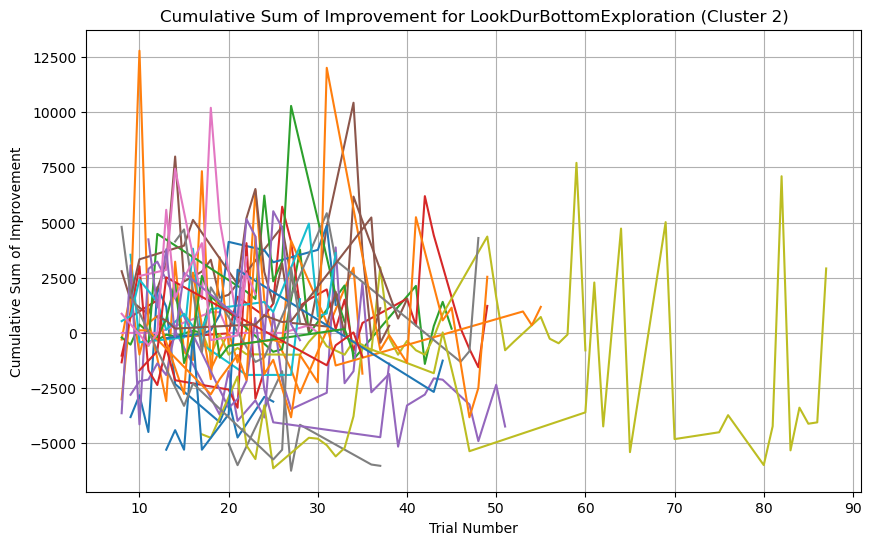

In [59]:
# Check progression (cumulative sum of improvement) of sessions in cluster 2 (tendency to get better in the memory task) for the following variables: 
# durExplorationPeriod, durDecisionPeriod, durPeriodTotal, NbSwitches, SwitchesExplorationPeriod, FixNb, FixNbInTDecision, FixNbBottomExploration, LookDurInTDecision, LookDurBottomExploration

sessions_cluster2 = [
    'curE002a', 'curE011a', 'curE012a', 'curE017a', 'curE018a', 'curE019a', 'curE027a', 'curE030a', 'curE038a', 
    'curE041a', 'curE045a', 'curE049a', 'curE052a', 'curE056a', 'curE063a', 'curE066a', 'curE067a', 'curE072a', 
    'curE075a', 'curE092a', 'curE104a', 'curE106a', 'curE109a', 'curE113a', 'curE115a', 'curE119a', 'curE121a', 
    'curE122a'
]

cumulative_improvement_data_cluster2 = {variable: [] for variable in variables}

for session in sessions_cluster2:
    session_data = data[data['session'] == session]
    for variable in variables:
        session_variable = f'{variable}_improvement'
        cumulative_improvement = session_data[session_variable].cumsum()
        cumulative_improvement_data_cluster2[variable].append(cumulative_improvement)

for variable in variables:
    plt.figure(figsize=(10, 6))
    for session, cumulative_improvement in zip(sessions_cluster2, cumulative_improvement_data_cluster2[variable]):
        plt.plot(data[data['session'] == session]['trialno'], cumulative_improvement, label=f'Session {session}')
    plt.title(f'Cumulative Sum of Improvement for {variable} (Cluster 2)')
    plt.xlabel('Trial Number')
    plt.ylabel('Cumulative Sum of Improvement')
    #plt.legend()
    plt.grid(True)
    plt.show()

In [104]:
# Calculate slope for accuracy and the improvement of the other variables

#Accuracy
cumulative_accuracy_data = []

for session, session_data in data.groupby('session'):
    cumulative_accuracy = 0
    for index, trial in session_data.iterrows():
        if trial['accuracy'] == 1:
            cumulative_accuracy += 1
        else:
            cumulative_accuracy -= 1
        cumulative_accuracy_data.append({'session': session, 'trialno': trial['trialno'], 'cumulative_accuracy': cumulative_accuracy})

cumulative_accuracy_df = pd.DataFrame(cumulative_accuracy_data)

slope_data_accuracy = []

for session, session_data in cumulative_accuracy_df.groupby('session'):
    trial_numbers = session_data['trialno']
    cumulative_accuracies = session_data['cumulative_accuracy']
    slopes = np.diff(cumulative_accuracies) / np.diff(trial_numbers)
    avg_slope = np.mean(slopes)
    slope_data_accuracy.append({'session': session, 'accuracy_slope': avg_slope})

slope_df_accuracy = pd.DataFrame(slope_data_accuracy)
slope_df_accuracy

# Variables
variables = [
    'durExplorationPeriod', 'durDecisionPeriod', 'durPeriodTotal', 'NbSwitches', 'SwitchesExplorationPeriod', 
    'FixNb', 'FixNbInTDecision', 'FixNbBottomExploration', 'LookDurInTDecision', 'LookDurBottomExploration'
]

slope_data_improvement = []

for variable in variables:
    cumulative_improvement_data = []
    for session, session_data in data.groupby('session'):
        cumulative_improvement = 0
        for index, trial in session_data.iterrows():
            if not pd.isnull(trial[f'{variable}_improvement']): 
                cumulative_improvement += trial[f'{variable}_improvement']
                cumulative_improvement_data.append({'session': session, 'cumulative_improvement': cumulative_improvement})
    
    cumulative_improvement_df = pd.DataFrame(cumulative_improvement_data)
    
    slope_data_variable = []
    for session, session_data in cumulative_improvement_df.groupby('session'):
        slopes = np.diff(session_data['cumulative_improvement']) / np.diff(session_data.index)
        avg_slope = np.mean(slopes)
        slope_data_variable.append({'session': session, f'{variable}_improvement_slope': avg_slope})
    
    slope_df_variable = pd.DataFrame(slope_data_variable)
    
    slope_data_improvement.append(slope_df_variable)

improvement_slope_df = pd.concat(slope_data_improvement, axis=1)
improvement_slope_df = improvement_slope_df.loc[:, ~improvement_slope_df.columns.duplicated()]

slopes_merged_df = pd.merge(slope_df_accuracy, improvement_slope_df, on='session')
slopes_merged_df.iloc[:, 1:] = scaler.fit_transform(slopes_merged_df.iloc[:, 1:])

slopes_merged_df

session  accuracy_slope  durExplorationPeriod_improvement_slope  \
0   curE002a        0.982471                                0.123323   
1   curE004a       -0.319304                                0.027797   
2   curE008a       -0.721915                               -0.666254   
3   curE009a       -0.224123                               -0.396151   
4   curE011a        1.583832                               -0.118153   
5   curE012a        0.614610                                0.087704   
6   curE013a       -1.668445                               -1.105784   
7   curE014a       -0.338093                               -4.745874   
8   curE017a        1.049573                                0.140131   
9   curE018a        0.737102                               -0.003970   
10  curE019a        0.311453                               -0.124266   
11  curE024a       -0.922262                               -0.213389   
12  curE027a        1.083640                                0.092509   
13  curE030a        2.931779                               -0.155526   
14  curE034a       -0.489934                                0.727403   
15  curE038a        0.977870                               -0.016819   
16  curE039a       -0.378906                                1.220402   
17  curE041a        0.016205                                0.054509   
18  curE045a        0.030967                                0.207929   
19  curE046a       -0.137097                               -0.350650   
20  curE049a        0.130438                                1.006966   
21  curE050a       -1.625788                                0.161004   
22  curE051a       -0.844935                                0.925426   
23  curE052a        1.536732                                0.081931   
24  curE054a       -0.651988                                0.068693   
25  curE055a       -1.743442                               -0.600408   
26  curE056a       -0.010636                               -0.036455   
27  curE058a       -1.170465                                2.853703   
28  curE062a       -0.820331                                0.646911   
29  curE063a        0.757164                                1.043698   
30  curE066a        0.098701                                0.108643   
31  curE067a        1.104932                                0.334467   
32  curE070a       -1.266279                               -0.185950   
33  curE071a       -1.054069                               -3.168621   
34  curE072a        1.124344                                0.454156   
35  curE074a       -0.925526                               -0.318174   
36  curE075a        0.640200                                0.276093   
37  curE078a       -1.032980                               -0.025073   
38  curE080a       -1.452465                                0.050864   
39  curE082a       -1.134591                               -0.256230   
40  curE090a       -0.443070                               -0.489114   
41  curE092a        0.040809                                0.117457   
42  curE098a       -1.483216                                1.163265   
43  curE104a        0.354697                                0.898759   
44  curE106a        0.554937                                0.039042   
45  curE109a        1.362371                               -0.174745   
46  curE112a       -0.304206                                0.566277   
47  curE113a        1.021454                               -0.015818   
48  curE115a        1.026862                               -0.440617   
49  curE119a        0.385265                               -0.018536   
50  curE120a       -0.869539                               -0.540020   
51  curE121a        0.593281                                0.699249   
52  curE122a        0.981912                               -0.011715   

    durDecisionPeriod_improvement_slope  durPeriodTotal_improvement_slope  \
0                             -0.218353

Cluster 0: ['curE002a', 'curE004a', 'curE008a', 'curE009a', 'curE011a', 'curE012a', 'curE013a', 'curE017a', 'curE018a', 'curE019a', 'curE024a', 'curE027a', 'curE030a', 'curE034a', 'curE038a', 'curE039a', 'curE041a', 'curE045a', 'curE046a', 'curE049a', 'curE050a', 'curE051a', 'curE052a', 'curE054a', 'curE055a', 'curE056a', 'curE062a', 'curE063a', 'curE066a', 'curE067a', 'curE070a', 'curE072a', 'curE074a', 'curE075a', 'curE078a', 'curE080a', 'curE082a', 'curE090a', 'curE092a', 'curE098a', 'curE104a', 'curE106a', 'curE109a', 'curE112a', 'curE113a', 'curE115a', 'curE119a', 'curE120a', 'curE121a', 'curE122a']
Cluster 1: ['curE014a', 'curE071a']
Cluster 2: ['curE058a']


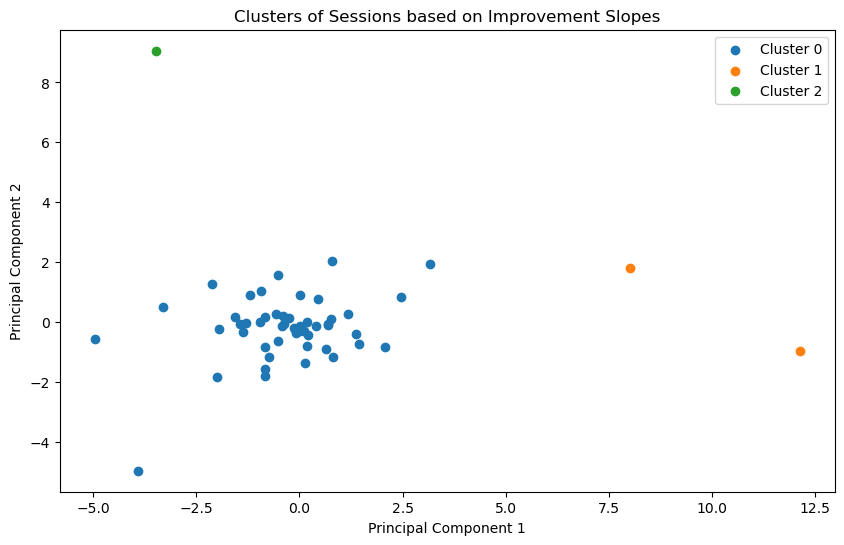

In [108]:
#Clustering sessions by their overall improvement 

features = slopes_merged_df.drop('session', axis=1)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_pca)
    wcss.append(kmeans.inertia_)

#plt.figure(figsize=(10, 6))
#plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
#plt.title('Elbow Method')
#plt.xlabel('Number of Clusters')
#plt.ylabel('WCSS')
#plt.show()

optimal_num_clusters = 3

kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features_pca)

cluster_groups = slopes_merged_df.groupby('cluster')['session'].apply(list)

for cluster, sessions in cluster_groups.items():
    print(f"Cluster {cluster}: {sessions}")

plt.figure(figsize=(10, 6))
for cluster in range(optimal_num_clusters):
    plt.scatter(features_pca[clusters == cluster, 0], features_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Clusters of Sessions based on Improvement Slopes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()